<a href="https://colab.research.google.com/github/alitourani/deep-learning-from-scratch/blob/main/Codes/CNNs/1_DigitClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Digit Classification**

🎯 **Goal:** The main goal of this application is to build a model that classifies handwritten digits from give images

🗄️ **Dataset:** [MNIST](https://yann.lecun.com/exdb/mnist/) (Modified National Institute of Standards and Technology) dataset

**I. Imports**

In [ ]:
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.datasets import mnist # We are using Keras's built-in mnist dataset
from tensorflow.keras.models import Sequential # A linear stack of model layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.utils import to_categorical

**II. Check the data structure**

Training data (image): (60000, 28, 28)
Test data (image): (10000, 28, 28)
-------------------------
Training labels (int): (60000,)
Test labels (int): (10000,)

A sample with associated label: 5


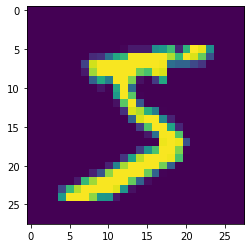

In [ ]:
(trainingData, trainingLabels), (testData, testLabels) = mnist.load_data()

print(f'Training data (image): {trainingData.shape}') # Contains 60,000 images (size: 28x28)
print(f'Test data (image): {testData.shape}') # Contains 10,000 images (size: 28x28)
print('-------------------------')
print(f'Training labels (int): {trainingLabels.shape}') # Contains 60,000 integers
print(f'Test labels (int): {testLabels.shape}') # Contains 10,000 integers

# Let's check some instances
print(f'\nA sample with associated label: {trainingLabels[0]}')
plt.imshow(trainingData[0])

**III. Implementing the Model**

In [ ]:
inputShape = (28, 28, 1) # Our input image sizes are 28x28 with one channel (grayscale)
numberOfFilters = 8 # The depth of the convolution
filterSize = 3 # The mask is 3x3
poolSize = 2 # While pooling, the max value over a 2x2 pooling window

model = Sequential([
  Conv2D(numberOfFilters, filterSize, input_shape=inputShape), # Applying Convolution
  MaxPooling2D(pool_size=poolSize), # Applying MaxPooling
  Flatten(), # Flattening the image
  Dense(10, activation='softmax'), # SoftMax
])

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 8)         0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 1352)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                13530     
Total params: 13,610
Trainable params: 13,610
Non-trainable params: 0
_________________________________________________________________


**IV. Compiling the model**

In [ ]:
optimizer = 'adam' # Other options: adamax, nadam, SGD, etc.
loss='categorical_crossentropy' # Other options: binary_crossentropy (2-classes)
metrics=['accuracy']

model.compile(
  optimizer,
  loss,
  metrics,
)

print('Model has been compiled successfully!')

Model has been compiled successfully!


**V. Training the model**

In [ ]:
numberOfEpochs = 10

print('Reshaping the images to add channels ...')
trainingData = np.expand_dims(trainingData, axis=3)
testData = np.expand_dims(testData, axis=3)
print(f'Training data shape: {trainingData.shape}')
print(f'Test data shape: {testData.shape}')

model.fit(
  trainingData,
  to_categorical(trainingLabels),
  epochs=numberOfEpochs,
  validation_data=(testData, to_categorical(testLabels))
)

Reshaping the images to add channels ...
Training data shape: (60000, 28, 28, 1)
Test data shape: (10000, 28, 28, 1)
Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 2.2227 - accuracy: 0.8942 - val_loss: 0.6041 - val_accuracy: 0.9381
Epoch 2/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.4680 - accuracy: 0.9430 - val_loss: 0.4752 - val_accuracy: 0.9434
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3418 - accuracy: 0.9497 - val_loss: 0.3341 - val_accuracy: 0.9503
Epoch 4/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2694 - accuracy: 0.9547 - val_loss: 0.3377 - val_accuracy: 0.9454
Epoch 5/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2267 - accuracy: 0.9574 - val_loss: 0.2467 - val_accuracy: 0.9562
Epoch 6/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2004 - accuracy: 0.9595 - val_loss: 0.2789 - val_accuracy: 0.9512
Epoch 7/10
18

**VI. Saving the model for later use (Optional)**

In [ ]:
fileName = 'digitClassifier.h5'
filePath = ''

# model.save_weights(filePath + fileName)

# We can later use the model by running 
# model.load_weights(filePath + fileName)

**VII. Predicting**

In [ ]:
numberOfSamples = 20

groundTruth = testLabels[:numberOfSamples]
predictions = model.predict(testData[:numberOfSamples])

predictedArray = np.argmax(predictions, axis=1)

print('Expected: ', groundTruth)
print('Predicted: ', predictedArray)

Expected:  [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
Predicted:  [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
